In [2]:
import pandas as pd
import numpy as np
from dwave.system import DWaveSampler
import matplotlib.pyplot as plt

data = pd.read_excel('./annealing_schedule.xlsx',  sheet_name='processor-annealing-schedule') 
s_vals = pd.DataFrame(data, columns=['s'])
A_vals = pd.DataFrame(data, columns=['A(s) (GHz)'])
B_vals = pd.DataFrame(data, columns=['B(s) (GHz)'])
cs_vals = pd.DataFrame(data, columns=['C (normalized)'])
first_s = s_vals.to_numpy().flatten()
first_A = A_vals.to_numpy().flatten()
first_B = B_vals.to_numpy().flatten()
first_c = cs_vals.to_numpy().flatten()

In [3]:
# f1 = open("token.txt", "r")
f2 = open("../paid_token.txt", "r")
# freetoken=f1.read()
paidtoken=f2.read()

#sampler = DWaveSampler(solver=dict(topology__type='zephyr'),token=freetoken)
sampler = DWaveSampler(solver=dict(topology__type='zephyr'),token=paidtoken)

print("QPU {} was selected.".format(sampler.solver.name))

QPU Advantage2_prototype1.1 was selected.


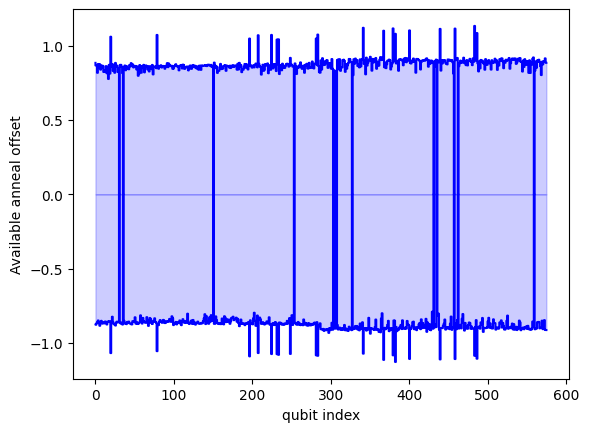

In [4]:
offsets = np.array(sampler.properties["anneal_offset_ranges"])
# plt.plot(offsets[:,0], color = 'black')
# plt.plot(offsets[:,1], color = 'black')
plt.fill_between(range(sampler.properties["num_qubits"]), offsets[:,0], step="pre", alpha=0.2, color = 'blue')
plt.fill_between(range(sampler.properties["num_qubits"]), offsets[:,1], step="pre", alpha=0.2, color = 'blue')

plt.plot(range(sampler.properties["num_qubits"]), offsets[:,0], drawstyle="steps", color = 'blue')
plt.plot(range(sampler.properties["num_qubits"]), offsets[:,1], drawstyle="steps", color = 'blue')
plt.xlabel('qubit index')
plt.ylabel('Available anneal offset')
plt.show()

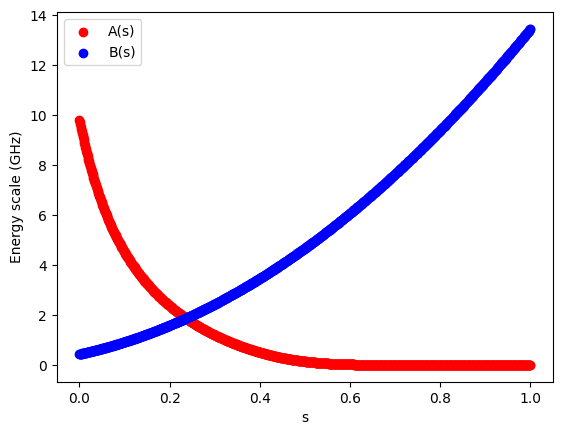

In [5]:
# plot
fig, ax = plt.subplots()

ax.scatter(first_s, first_A, c = 'red', label='A(s)')
ax.scatter(first_s, first_B, c = 'blue', label='B(s)')

plt.ylabel('Energy scale (GHz)')
plt.xlabel('s')

plt.legend()

plt.show()

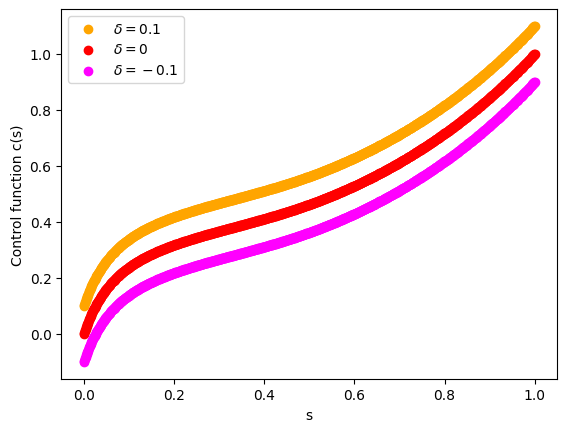

In [6]:

# plot
fig, ax = plt.subplots()

ax.scatter(first_s, first_c + 0.1, c = 'orange', label=r'$\delta = 0.1$')
ax.scatter(first_s, first_c, c = 'red', label=r'$\delta = 0$')
ax.scatter(first_s, first_c - 0.1, c = 'magenta', label=r'$\delta = -0.1$')


plt.ylabel('Control function c(s)')
plt.xlabel('s')

plt.legend()

plt.show()

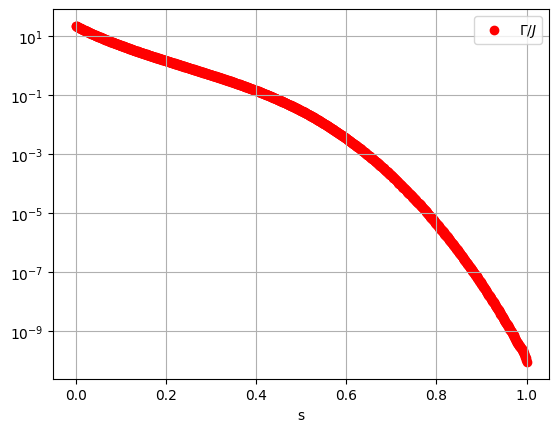

In [7]:
import matplotlib.pyplot as plt


# plot
fig, ax = plt.subplots()

ax.scatter(first_s, np.divide(first_A, first_B), c = 'red', label=r'$\Gamma/J$')
#ax.scatter(new_s, new_B, c = 'blue', label='B(s)')

plt.xlabel('s')
plt.yscale('log')
plt.legend()
plt.grid('on')
plt.show()

In [8]:
#A^2/B
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


#finer s grid
new_s = np.linspace(0,1,num = 100*len(first_s))
new_A = np.interp(new_s, first_s, first_A)
new_B = np.interp(new_s, first_s, first_B)
new_c = np.interp(new_s, first_s, first_c)

A2divB = np.divide(new_A**2,new_B)

indices = len(new_A)*np.ones(len(new_A),dtype=np.int8)
delta_c = np.zeros(len(new_A))
differences = np.zeros(len(new_A))

for i in range(len(new_A)):
    val = find_nearest(A2divB, value = new_A[i])
    differences[i]= A2divB[val] - new_A[i]
    indices[i] = val
    delta_c[i] = new_c[val] - new_c[i] 


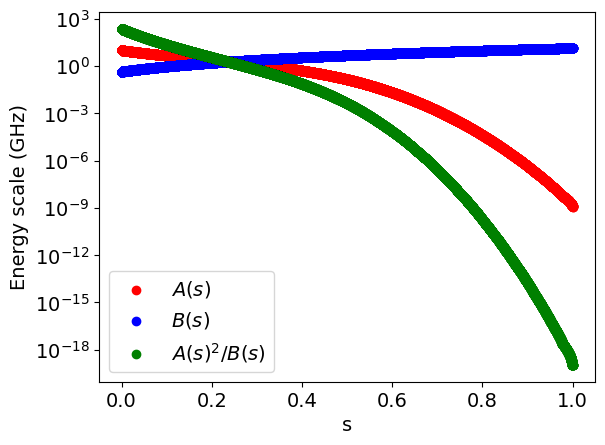

In [30]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, new_A, c = 'red', label=r'$A(s)$')
ax.scatter(new_s, new_B, c = 'blue', label=r'$B(s)$')
ax.scatter(new_s, A2divB, c = 'green', label=r'$A(s)^2/B(s)$')


plt.ylabel('Energy scale (GHz)')
plt.xlabel('s')
plt.yscale('log')
plt.legend()

plt.show()

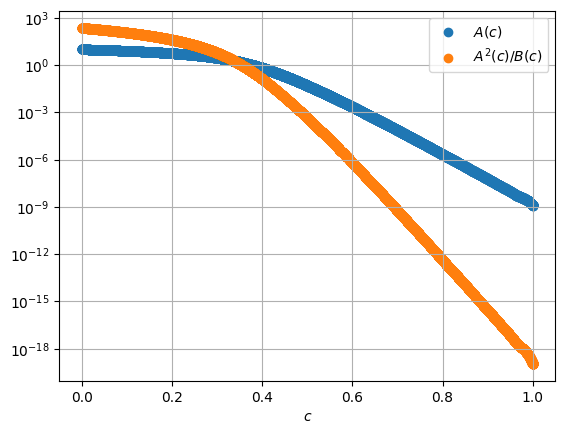

In [9]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_c, new_A, label=r"$A(c)$")
ax.scatter(new_c, A2divB,  label=r"$A^2(c)/B(c)$")
plt.xlabel(r'$c$')
plt.legend()
#plt.ylabel(r'$\delta c_2$')
ax.set_yscale('log')
plt.grid()
plt.show()

<Figure size 1000x320 with 0 Axes>

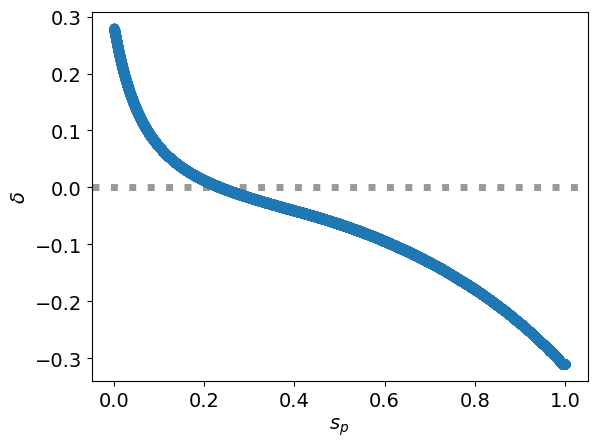

In [13]:
# plot
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,3.2))

fig, ax = plt.subplots()
plt.axhline(y=0, color='black', linestyle='dotted', alpha=0.4, lw=5)  # Extend horizontal line across the plots
ax.scatter(new_s, delta_c, zorder = 10)
plt.xlabel(r'$s_{p}$')
plt.ylabel(r'$\delta$')
# plt.grid()
plt.show()

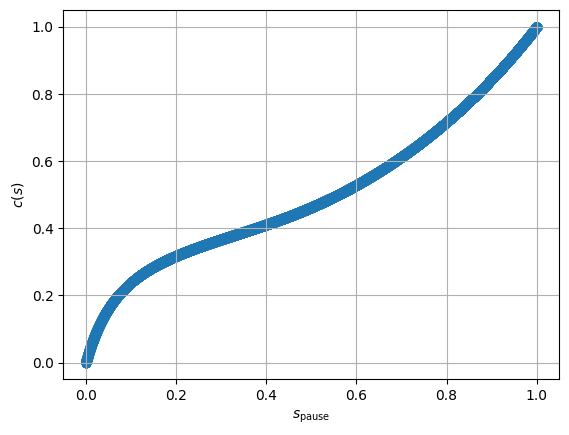

In [10]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, new_c)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$c(s)$')
plt.grid()
plt.show()

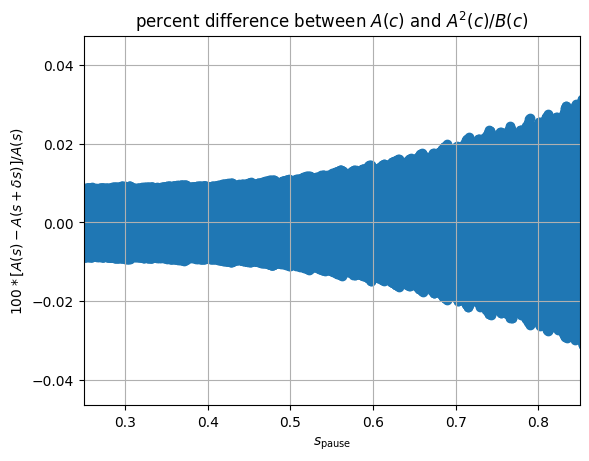

In [11]:
# plot
fig, ax = plt.subplots()

ax.scatter(new_s, 100*np.divide(differences, new_A))
#ax.scatter(new_s, differences)
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'$100*[A(s) - A(s + \delta s)]/A(s)$')
plt.xlim([0.25, 0.85])
#plt.ylim([-50, 50])
plt.title(r"percent difference between $A(c)$ and $A^2(c)/B(c)$")
plt.grid()
plt.show()

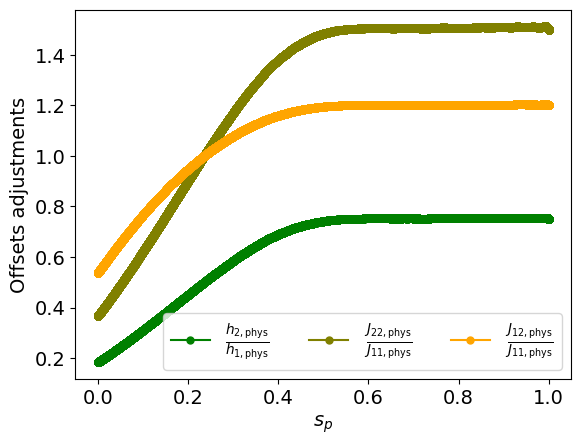

In [25]:
#h value, J_12, J_22

hoffset = np.divide(new_B,2*new_B[indices])
J22 = np.divide(new_B,new_B[indices])
J12 = np.divide(2*new_B,new_B + new_B[indices])

fig, ax = plt.subplots()

plt.plot(new_s, hoffset, label=r"$\frac{h_{2, \rm phys}}{h_{1,\rm phys}}$", marker = 'o', color = "green", ms = 5)
plt.plot(new_s, J22, label=r"$\frac{J_{22, \rm phys}}{J_{11, \rm phys}}$", marker = 'o', color = "olive", ms = 5)
plt.plot(new_s, J12, label=r"$\frac{J_{12, \rm phys}}{J_{11, \rm phys}}$", marker = 'o', color = "orange", ms = 5)

plt.legend(ncols = 3)
#ax.set_yscale('log')
plt.xlabel(r'$s_{p}$')
plt.ylabel(r'Offsets adjustments')
# plt.grid()
plt.show()


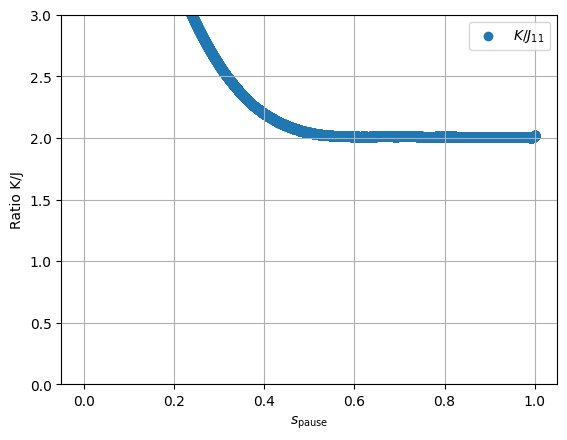

In [13]:
#h value, J_12, J_22

K = 2
Jprime = 0.66

Kcomp = K*new_B[indices]/2
J11_comp = Jprime*new_B/2
KoverJ = np.divide(new_B[indices], new_B)*K/Jprime

fig, ax = plt.subplots()

#ax.scatter(new_s, Kcomp, label=r"$K$")
#ax.scatter(new_s, J11_comp, label=r"$J_{11}$")
ax.scatter(new_s, KoverJ, label=r"$K/J_{11}$")

plt.legend()
#ax.set_yscale('log')
plt.xlabel(r'$s_{\rm pause}$')
plt.ylabel(r'Ratio K/J')
plt.ylim([0,3])
plt.grid()
plt.show()


# schedule visualization

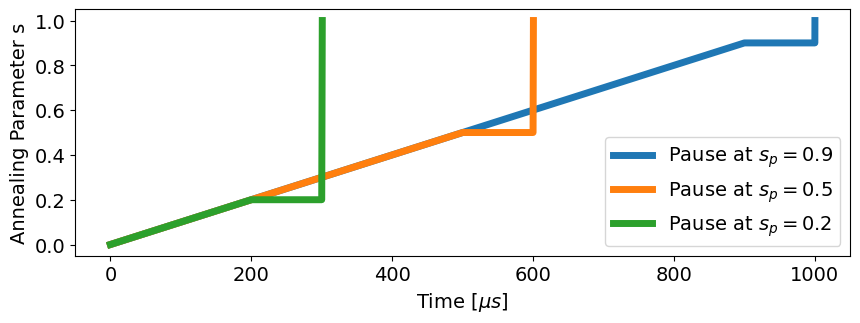

In [18]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,3.2))
ax = plt.gca()
# ax.set_title("Schedule Comparison")
for test_sp in [0.9, 0.5, 0.2]:
    # test_sp = 0.9
    basic_schedule = [[0.0, 0.0], [1000*test_sp, test_sp], [100 + 1000*test_sp, test_sp],
                        [100 + 1000*test_sp + (1-test_sp), 1]]
    ax.plot([basic_schedule[i][0] for i in range(len(basic_schedule))],
     [basic_schedule[i][1] for i in range(len(basic_schedule))], 
     label = r'Pause at $s_p=$' + str(test_sp), linewidth = 5)
# ax.plot([zx_schedule[i][0] for i in range(len(zx_schedule))], [zx_schedule[i][1] for i in range(len(zx_schedule))], label = 'global X pulse')
# ax.plot([h_schedule[i][0] for i in range(len(h_schedule))], [h_schedule[i][1] for i in range(len(h_schedule))], label = 'h gain schedule')
# plt.legend()
plt.xlabel(r'Time [$\mu s$]')
plt.legend(loc = 'lower right')
plt.ylabel('Annealing Parameter s')
# plt.title(r'Pause at $s_p=$' + str(test_sp))
plt.show()

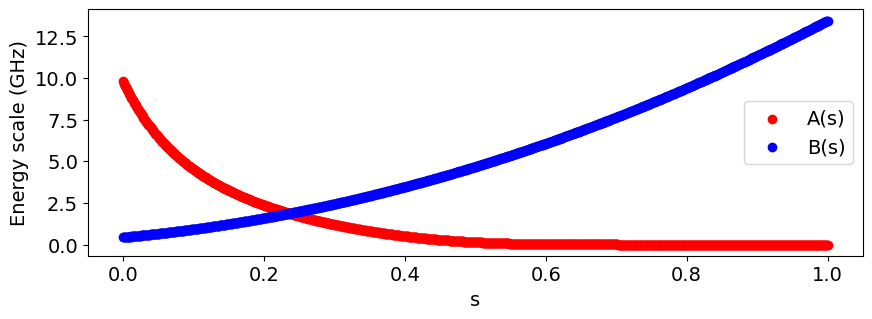

In [23]:
# plot
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,3.2))

plt.scatter(first_s, first_A, c = 'red', label='A(s)')
plt.scatter(first_s, first_B, c = 'blue', label='B(s)')

plt.ylabel('Energy scale (GHz)')
plt.xlabel('s')

plt.legend()

plt.show()

# classical magnetization plot

In [ ]:
plot_data = np.load("../data_prathus_runs/classical_process/")